### import library

In [43]:
import numpy  as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense


### Load data and process data

In [25]:
def load_data(path):
    text = []
    label = []
    with open(path) as file :
        for line in file:
            tokens = line.split()
            label.append(tokens[0])
            text.append(' '.join(tokens[1:]))
    return text, label

In [26]:
X,y = load_data("data/data")

In [27]:
print(f"total text :{len(X)}" )
print(f"total label :{len(y)}" )

total text :5574
total label :5574


In [28]:
X[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

Define word-to-integer and integer-to-word mappings

In [29]:
word2int= {'ham':0,'spam':1}
int2word= {0:'ham',1:'spam'}

In [30]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
x_num = tokenizer.texts_to_sequences(X)
x_num = np.array(x_num,dtype=object)
y=np.array(y)

In [31]:
for i in range(6):
    print(X[i])
    print(x_num[i])
    print("--"*50)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
[49, 472, 4436, 843, 756, 659, 64, 8, 1328, 87, 123, 352, 1329, 148, 2996, 1330, 67, 58, 4437, 144]
----------------------------------------------------------------------------------------------------
Ok lar... Joking wif u oni...
[46, 337, 1500, 473, 6, 1941]
----------------------------------------------------------------------------------------------------
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
[47, 490, 8, 19, 4, 798, 902, 2, 176, 1942, 1106, 660, 1943, 2331, 261, 2332, 71, 1942, 2, 1944, 2, 338, 490, 556, 961, 73, 392, 174, 661, 393, 2997]
----------------------------------------------------------------------------------------------------
U dun say so early hor... U c already then say...
[6, 248, 150, 23, 383, 2998, 6, 139, 154, 57, 150]
------------------

In [32]:
# Assume sen_length is defined somewhere in your code
sen_length = 100
# padding sequences 
x_num = pad_sequences(x_num,maxlen=sen_length)
y = [word2int[i] for i in y]

In [34]:
# Convert labels to categorical format
y_categorical = to_categorical(y)
for i in range(6):
    print(y[i]) 
    print(y_categorical[i])
    print("----------------------") 

0
[1. 0.]
----------------------
0
[1. 0.]
----------------------
1
[0. 1.]
----------------------
0
[1. 0.]
----------------------
0
[1. 0.]
----------------------
1
[0. 1.]
----------------------


In [36]:
# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(x_num, y_categorical, test_size=0.25, random_state=7)

# Print shapes of the split datasets
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('Y_train:', Y_train.shape)
print('Y_test:', Y_test.shape)


X_train: (4180, 100)
X_test: (1394, 100)
Y_train: (4180, 2)
Y_test: (1394, 2)


In [38]:

def generate_embedding(tokenizer, dim):
    embedding = {}
    with open(f"data/glove.6B/glove.6B.{dim}d.txt", encoding='utf8') as file:
        for line in tqdm.tqdm(file, desc="Reading the Glove file"):
            tokens = line.split()
            word = tokens[0]
            vector = np.array(tokens[1:], dtype='float32')
            embedding[word] = vector

    word_index = tokenizer.word_index
    embedding_matrix = np.zeros((len(word_index) + 1, dim))
    for word, index in word_index.items():
        vector = embedding.get(word)
        if vector is not None:
            embedding_matrix[index] = vector

    return embedding_matrix

# Generate the embedding matrix
embedding_matrix = generate_embedding(tokenizer, 100)

Reading the Glove file: 400000it [00:24, 16466.35it/s]


In [42]:
# Get the index of the word "this" from the tokenizer
word_index = tokenizer.word_index
word_index_this = word_index.get("this")

# Access the embedding vector for the word "this" from the embedding matrix
if word_index_this is not None:
    embedding_vector = embedding_matrix[word_index_this]
    print(f"Embedding vector for 'this': {embedding_vector}")
else:
    print("The word 'this' is not in the tokenizer's word index.")


Embedding vector for 'this': [-0.57058001  0.44183001  0.70102    -0.41712999 -0.34057999  0.02339
 -0.071537    0.48177001 -0.013121    0.16834    -0.13389     0.040626
  0.15827    -0.44341999 -0.019403   -0.009661   -0.046284    0.093228
 -0.27331001  0.22849999  0.33089    -0.36474001  0.078741    0.3585
  0.44757    -0.2299      0.18076999 -0.62650001  0.053852   -0.29154
 -0.42559999  0.62902999  0.14393    -0.046004   -0.21007     0.48879001
 -0.057698    0.37430999 -0.030075   -0.34494001 -0.29701999  0.15095
  0.28248    -0.16577999  0.076131   -0.093016    0.79364997 -0.60488999
 -0.18874    -1.01730001  0.31962001 -0.16344     0.54176998  1.17250001
 -0.47874999 -3.3842001  -0.081301   -0.35280001  1.83720005  0.44516
 -0.52666003  0.99786001 -0.32178     0.033462    1.17830002 -0.072905
  0.39737001  0.26166001  0.33111    -0.35629001 -0.16558    -0.44382
 -0.14183    -0.37976     0.28994    -0.029114   -0.35168999 -0.27693999
 -1.34399998  0.19554999  0.16887     0.040237 

In [46]:
embedding_matrix.shape

(9013, 100)

### build model

In [47]:


def build_model(embedding_matrix, lstm_units, sen_length):
    model = Sequential()
    model.add(Embedding(input_dim=embedding_matrix.shape[0], 
                        output_dim=embedding_matrix.shape[1],
                        weights=[embedding_matrix], 
                        trainable=False,
                        input_shape=(sen_length,)))
    model.add(LSTM(lstm_units, recurrent_dropout=0.2))
    model.add(Dropout(0.3))  # Optional, but typically helps with regularization
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='rmsprop', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    model.summary()
    return model

# Example usage:
# embedding_matrix = generate_embedding(tokenizer, 100)  # Ensure this is correctly generated

model = build_model(embedding_matrix, lstm_units=128, sen_length=100)


d:\github\simple-deep-learning-project\simple-project\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 100)       │       901,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,018,806 (3.89 MB)

 Trainable params: 117,506 (459.01 KB)

 Non-trainable params: 901,300 (3.44 MB)

In [48]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(X_train, Y_train, 
                    validation_data=(X_test, Y_test), 
                    batch_size=64, 
                    epochs=10, 
                    verbose=1)




Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 193ms/step - accuracy: 0.8972 - loss: 0.2563 - val_accuracy: 0.9699 - val_loss: 0.0937
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 249ms/step - accuracy: 0.9693 - loss: 0.0943 - val_accuracy: 0.9727 - val_loss: 0.0840
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 227ms/step - accuracy: 0.9804 - loss: 0.0672 - val_accuracy: 0.9763 - val_loss: 0.0749
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 224ms/step - accuracy: 0.9788 - loss: 0.0666 - val_accuracy: 0.9742 - val_loss: 0.0771
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 209ms/step - accuracy: 0.9757 - loss: 0.0754 - val_accuracy: 0.9763 - val_loss: 0.0697
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 212ms/step - accuracy: 0.9867 - loss: 0.0493 - val_accuracy: 0.9756 - val_loss: 0.0695
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 211ms/step - accuracy: 0.9881 - loss: 0.0397 - val_accuracy: 0.9749 - val_loss: 0.0726
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 211ms/step - accuracy: 0.9871 - loss: 0.0417 - val_accu

### model evaluation 

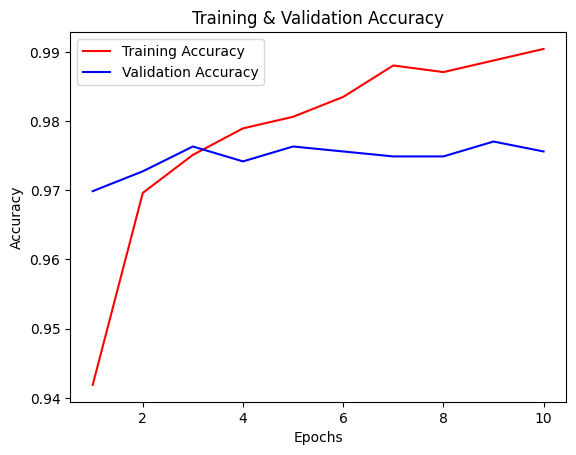

In [49]:
# Extract accuracy and validation accuracy from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# Plot accuracy
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [53]:
def prediction(model, sms, tokenizer, int2word, sen_length):
    # Convert the SMS to sequences
    seq = tokenizer.texts_to_sequences([sms])
    # Pad the sequences
    seq = pad_sequences(seq, maxlen=sen_length)
    # Predict the class
    predict = model.predict(seq)[0]
    # Get the class with the highest probability
    predicted_class = np.argmax(predict)
    # Convert the class index to word
    return int2word[predicted_class]

# Example usage:
# Assuming 'tokenizer', 'int2word', 'sen_length' are defined
sms = """
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
"""


predicted_label = prediction(model, sms, tokenizer, int2word, sen_length)
print(predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
spam
